In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 讀入三個月期LIBOR資料，算sharpe ratio時當rf

In [2]:
#LIBOR利率，可用來當rf，但2008~2017的資料筆數卻比較多？要用要看怎麼merge
LIBOR = pd.read_csv('/Users/Kang/Desktop/0_3 LIBOR_3M.csv', index_col = 'DATE')
LIBOR = LIBOR[LIBOR['USD3MTD156N'] != '.']
LIBOR = LIBOR.astype({'USD3MTD156N' : float})
LIBOR = LIBOR.div(100)
LIBOR = LIBOR.set_index(pd.to_datetime(LIBOR.index))
LIBOR['2008-01-02':'2017-12-29']

,USD3MTD156N
DATE,
2008-01-02,0.046806
2008-01-03,0.046463
2008-01-04,0.046200
2008-01-07,0.045431
2008-01-08,0.045050
2008-01-09,0.044425
2008-01-10,0.043769
2008-01-11,0.042575
2008-01-14,0.040550


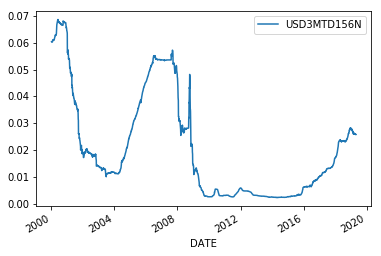

In [3]:
LIBOR.plot()

# 讀入起自2008年的股價資料，先算daily return再換算monthly return

In [4]:
df = pd.read_csv('/Users/Kang/Desktop/0_2 ETF 2008_2017.csv', index_col = 'Date')
df = df.set_index(pd.to_datetime(df.index))

In [5]:
#換算成daily_return
daily_return = df.pct_change()
daily_return = daily_return.dropna(how = 'all') #drop掉2007-12-31

In [6]:
#所有ETF名稱
all_ticker = daily_return.columns.tolist()

#挑出所有年月的最後一天
all_max_day = []
for i in range(daily_return.index.year.min(), daily_return.index.year.max()+1):
    for j in range(1, 13):
        mday = daily_return.loc[(daily_return.index.year == i) & (daily_return.index.month == j)].index.day.max()
        all_max_day.append(str(i) + '-' + ('0'+str(j) if j < 10 else str(j)) + '-' + str(mday))

In [7]:
#建立df_m用來儲存月報酬
monthly_return = pd.DataFrame(index = all_max_day, columns = all_ticker)
monthly_return = monthly_return.set_index(pd.DatetimeIndex(monthly_return.index))

In [8]:
#換算成monthly_return
for i in monthly_return.index:
    for j in all_ticker:
        d_return = daily_return[j][(daily_return.index.year == i.year) & (daily_return.index.month == i.month)]
        monthly_return[j][i] = (1 + d_return).cumprod()[-1] - 1

In [9]:
monthly_return

,AGG,EMB,EWT,IVV,JNK,PFF,TLT,VGK,VNQ,VPL,VWO
2008-01-31,0.0231302,0.00947102,-0.089155,-0.0626965,-0.0233967,0.0973488,0.0209581,-0.0898154,-0.00780984,-0.0553506,-0.090221
2008-02-29,-0.00160068,-0.00406475,0.1271,-0.0275556,-0.034404,-0.00107939,-0.00455278,-0.00293685,-0.0318135,-0.0175,0.0287706
2008-03-31,0.00129747,0.000930937,0.0272197,-0.00631514,0.0046464,-0.0569642,0.0213892,0.0131074,0.0648526,-0.019243,-0.0367752
2008-04-30,0.00327508,0.0116158,0.044795,0.0482493,0.0372413,0.0633014,-0.024863,0.0409942,0.0637923,0.077185,0.0843345
2008-05-30,-0.0126525,0.0010462,-0.0199275,0.0128415,0.00387323,-0.00369009,-0.0268827,0.00670303,-0.00210926,0.0222795,0.0178502
2008-06-30,-0.00184917,-0.0198113,-0.12939,-0.0838839,-0.0345545,-0.0946641,0.0265359,-0.0898877,-0.106154,-0.0801063,-0.0980921
2008-07-31,0.00393986,0.00787871,-0.0700637,-0.00742179,-0.0111478,-0.0462702,-0.00367336,-0.0288063,0.0311536,-0.0393789,-0.0472222
2008-08-29,0.00741851,0.00715307,-0.0083712,0.0148761,-0.00219789,0.00126808,0.027393,-0.0384498,0.0237381,-0.0511581,-0.0791658
2008-09-30,-0.0175968,-0.0714504,-0.171144,-0.0888156,-0.0761747,-0.246504,0.0147586,-0.128937,-0.00123703,-0.0915,-0.155869
2008-10-31,-0.0228108,-0.193936,-0.184259,-0.166324,-0.190863,0.0432927,-0.0186061,-0.218287,-0.31727,-0.185579,-0.272649


# 讀取有view的權重，逐月當成P

In [10]:
CP_w = pd.read_csv('/Users/Kang/Desktop/3_2 RI long short weight.csv', index_col = 0)
CP_w = CP_w.set_index(pd.to_datetime(CP_w.index))
CP_w = CP_w[all_ticker] #用all_ticker的順序來排列column

In [11]:
all_max_day_from_2010 = CP_w.index.values #all_max_day有120個月

#df_w用來儲存最後的原始權重（加起來不見得等於1）
df_w = pd.DataFrame(index = all_max_day_from_2010, columns = all_ticker)
df_w = df_w.set_index(pd.DatetimeIndex(df_w.index))

#df_w_adj用來儲存最後的調整權重（加起來等於1）
df_w_adj = pd.DataFrame(index = all_max_day_from_2010, columns = all_ticker)
df_w_adj = df_w_adj.set_index(pd.DatetimeIndex(df_w_adj.index))

# 使用Black-Litterman，逐月計算最後權重，有調整、沒調整分開存

In [12]:
#從頭到尾固定的參數
w0 = {'AGG' : 0.1, 'EMB' : 0.05, 'EWT' : 0.1, 'IVV' : 0.2, 'JNK' : 0.05, 'PFF' : 0.05, 'TLT' : 0.05, 'VGK' : 0.1, 'VNQ' : 0.1, 'VPL' : 0.1, 'VWO' : 0.1}
Weq = np.array([[w0[i] for i in all_ticker]]).T
gamma = 3.37
tau = 0.05
Q = 0.035 #CP是0.05，#RI是0.035

In [13]:
for i in range(len(CP_w)):

    P = np.array([CP_w.iloc[i].values]) #CP_w有96個月，8年
    Sigma = np.cov(monthly_return.iloc[i : i + 25].astype(float), rowvar = False) #df_m有120個月，10年
    Pi = gamma * Sigma.dot(Weq)
    Omega = P.dot(tau*Sigma).dot(P.T)
    M_inv = np.linalg.inv(np.linalg.inv(tau * Sigma) + (P.T).dot(np.linalg.inv(Omega)).dot(P))
    Sigma_bar = Sigma + M_inv
    Sigma_bar_inv = np.linalg.inv(Sigma_bar)
    W_star = (1/gamma) * Sigma_bar_inv.dot(M_inv).dot(np.linalg.inv(tau * Sigma).dot(Pi) + (P.T).dot(np.linalg.inv(Omega)).dot(Q))
    W_star_adj = W_star/W_star.sum() #把和調整為1
    df_w.iloc[i] = W_star.T #都要反轉才能存
    df_w_adj.iloc[i] = W_star_adj.T

In [14]:
df_w

,AGG,EMB,EWT,IVV,JNK,PFF,TLT,VGK,VNQ,VPL,VWO
2010-01-29,-0.0512746,0.047619,0.144076,0.190476,-0.0500561,0.047619,-0.147731,0.0464005,0.241751,0.290588,0.192913
2010-02-26,0.0952381,0.047619,1.23924,-0.190857,0.810286,0.047619,-1.09638,-1.4301,0.476572,1.62057,-0.667429
2010-03-31,-0.01752,0.047619,0.207996,0.359613,0.047619,-0.00876001,-0.177897,-0.0738991,0.320754,0.0952381,0.151617
2010-04-30,-0.184129,0.047619,0.0952381,0.609528,0.326987,0.187303,-0.511116,-0.0444457,-0.323813,0.0952381,0.653973
2010-05-28,0.0952381,0.047619,0.980395,0.633055,1.81793,-1.28012,-0.394959,-1.67508,-0.789919,0.0952381,1.42297
2010-06-30,0.809074,0.047619,0.630615,0.368935,-0.309299,0.047619,0.404537,-0.618598,-0.440139,0.0952381,-0.0832209
2010-07-30,1.31828,0.047619,0.910599,0.598157,0.047619,-0.360062,-0.767742,-1.53548,-1.1278,0.0952381,1.72596
2010-08-31,1.87166,0.047619,-0.496903,0.782617,1.2319,0.047619,-2.32094,-1.68118,-1.08904,0.0952381,2.4638
2010-09-30,-0.0773504,0.047619,0.181532,0.190476,0.220208,0.392796,-0.297558,-0.163645,0.00894387,0.0952381,0.354121
2010-10-29,-0.0546095,0.047619,0.145187,0.340324,-0.00233014,0.047619,-0.152178,-0.00466028,0.195136,0.0952381,0.295035


In [15]:
df_w_adj

,AGG,EMB,EWT,IVV,JNK,PFF,TLT,VGK,VNQ,VPL,VWO
2010-01-29,-0.0538383,0.05,0.151279,0.2,-0.0525589,0.05,-0.155118,0.0487206,0.253838,0.305118,0.202559
2010-02-26,0.1,0.05,1.3012,-0.2004,0.850801,0.05,-1.1512,-1.5016,0.5004,1.7016,-0.700801
2010-03-31,-0.018396,0.05,0.218396,0.377594,0.05,-0.00919801,-0.186792,-0.077594,0.336792,0.1,0.159198
2010-04-30,-0.193336,0.05,0.1,0.640004,0.343336,0.196668,-0.536672,-0.046668,-0.340004,0.1,0.686672
2010-05-28,0.1,0.05,1.02941,0.664707,1.90883,-1.34412,-0.414707,-1.75883,-0.829415,0.1,1.49412
2010-06-30,0.849528,0.05,0.662146,0.387382,-0.324764,0.05,0.424764,-0.649528,-0.462146,0.1,-0.087382
2010-07-30,1.38419,0.05,0.956129,0.628065,0.05,-0.378065,-0.806129,-1.61226,-1.18419,0.1,1.81226
2010-08-31,1.96524,0.05,-0.521748,0.821748,1.2935,0.05,-2.43699,-1.76524,-1.1435,0.1,2.58699
2010-09-30,-0.0812179,0.05,0.190609,0.2,0.231218,0.412436,-0.312436,-0.171827,0.00939106,0.1,0.371827
2010-10-29,-0.0573399,0.05,0.152447,0.35734,-0.00244664,0.05,-0.159787,-0.00489329,0.204893,0.1,0.309787


In [16]:
#df_w.to_csv('/Users/Kang/Desktop/BL RI weight_unadj.csv')
#df_w_adj.to_csv('/Users/Kang/Desktop/BL RI weight_adj.csv')

In [17]:
#未調整前的權重全部加起來都一樣？
for i in range(len(df_w)):
    print(df_w.iloc[i].sum())

0.9523809523808862
0.9523809523811776
0.9523809523811471
0.9523809523803939
0.9523809523810096
0.9523809523809281
0.9523809523808998
0.952380952380923
0.9523809523809348
0.9523809523808968
0.9523809523809206
0.9523809523808842
0.9523809523810849
0.9523809523810118
0.9523809523810195
0.952380952381165
0.9523809523808824
0.9523809523810698
0.9523809523810847
0.9523809523810474
0.9523809523807719
0.9523809523806657
0.9523809523809916
0.95238095238101
0.9523809523809212
0.9523809523810592
0.9523809523810719
0.9523809523809805
0.9523809523809974
0.9523809523811906
0.9523809523809824
0.9523809523805837
0.9523809523808131
0.9523809523809854
0.9523809523808134
0.9523809523808562
0.9523809523808948
0.9523809523810508
0.952380952380778
0.952380952381086
0.9523809523809819
0.9523809523810298
0.9523809523810605
0.9523809523809379
0.9523809523808908
0.9523809523809528
0.952380952380643
0.9523809523809273
0.9523809523809283
0.95238095238097
0.95238095238096
0.952380952381052
0.9523809523808021
0.952